In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from distributions import sample, expectation, Normal, Categorical, Mixture, PiecewiseUniform

%matplotlib inline

In [2]:
from scipy.stats import levy_stable

def convert_to_bins_stable(alpha, beta, mu, sigma, n=10, lower = -1, upper = 1):
    step = (upper-lower)/n
    
    i = lower
    bins = []
    probs = []
    while True:
        if i >=upper:
            break
        j = round(i + step, 2)
        
        bins.append((i, j))
        if i == lower:
            low = -np.inf
        else:
            low = i
        
        if abs(j - upper) < step/2:
            high = np.inf
        else:
            high = j
        
        probs.append(levy_stable.cdf(high, alpha, beta, loc=mu, scale=sigma) - levy_stable.cdf(low, alpha, beta, loc=mu, scale=sigma))
    
        i = j 
        
    return PiecewiseUniform(bins, probs) 

alpha_list = [1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8]
beta_list = [-0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4]
mu_list = [-0.08, -0.05, -0.03, -0.001, 0.01, 0.016, 0.021, 0.025, 0.029, 0.032, 0.035, 0.037, 0.038]
sigma_list = [0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]
#sigma_list = [0.08, 0.10, 0.12, 0.14, 0.16, 0.18]

probs_list = []

def create_dists():
    #n = len(mu_list)*len(alpha_list)*len(beta_list)85
    n = len(alpha_list)*len(beta_list)
    i = 0    
    for ind in range(len(alpha_list)):
        for beta in beta_list:
            #for mu in mu_list:
            alpha = alpha_list[ind]
            j = 0
            for sigma in sigma_list:
                mu = mu_list[ind]*(j//2 + 0.3)/2
                dist = convert_to_bins_stable(alpha, beta, mu, sigma)
                
                #print(dist.mu)
                if dist.mu < 0.01 or dist.mu > 0.14:
                    continue
                probs = dist.probabilities
                probs_list.append(probs)
                j+=1
            i+=1
    
    
create_dists()
#stock_dists is now a dictionary of true distributions

In [33]:
len(probs_list)

13600

In [4]:
probs_list = probs_list*10

In [5]:
#len(probs_list)

In [22]:
import dirichlet

In [7]:
probs_list = np.array(probs_list)

In [23]:
#def mle(D, tol=1e-7, method="meanprecision", maxiter=None):
params = dirichlet.mle(probs_list, tol=1e-7, method="fixedpoint")

In [24]:
params

array([ 2.04384224,  1.25739246,  2.25103129,  5.28486598, 14.49720341,
       25.89638925, 13.8111208 ,  2.90207659,  0.95780393,  0.95166241])

In [10]:
params

array([ 2.04392125,  1.25743422,  2.25112032,  5.28510412, 14.49789786,
       25.89764888, 13.81178124,  2.90219737,  0.95783222,  0.95169044])

In [28]:
import scipy.stats as stats

In [38]:
sample_dists = stats.dirichlet.rvs(params, size = 10)

In [39]:
labels = [(-1, -0.8),
 (-0.8, -0.6),
 (-0.6, -0.4),
 (-0.4, -0.2),
 (-0.2, 0.0),
 (0.0, 0.2),
 (0.2, 0.4),
 (0.4, 0.6),
 (0.6, 0.8),
 (0.8, 1.0)]

In [40]:
plt.rcParams.update({'font.size': 20})

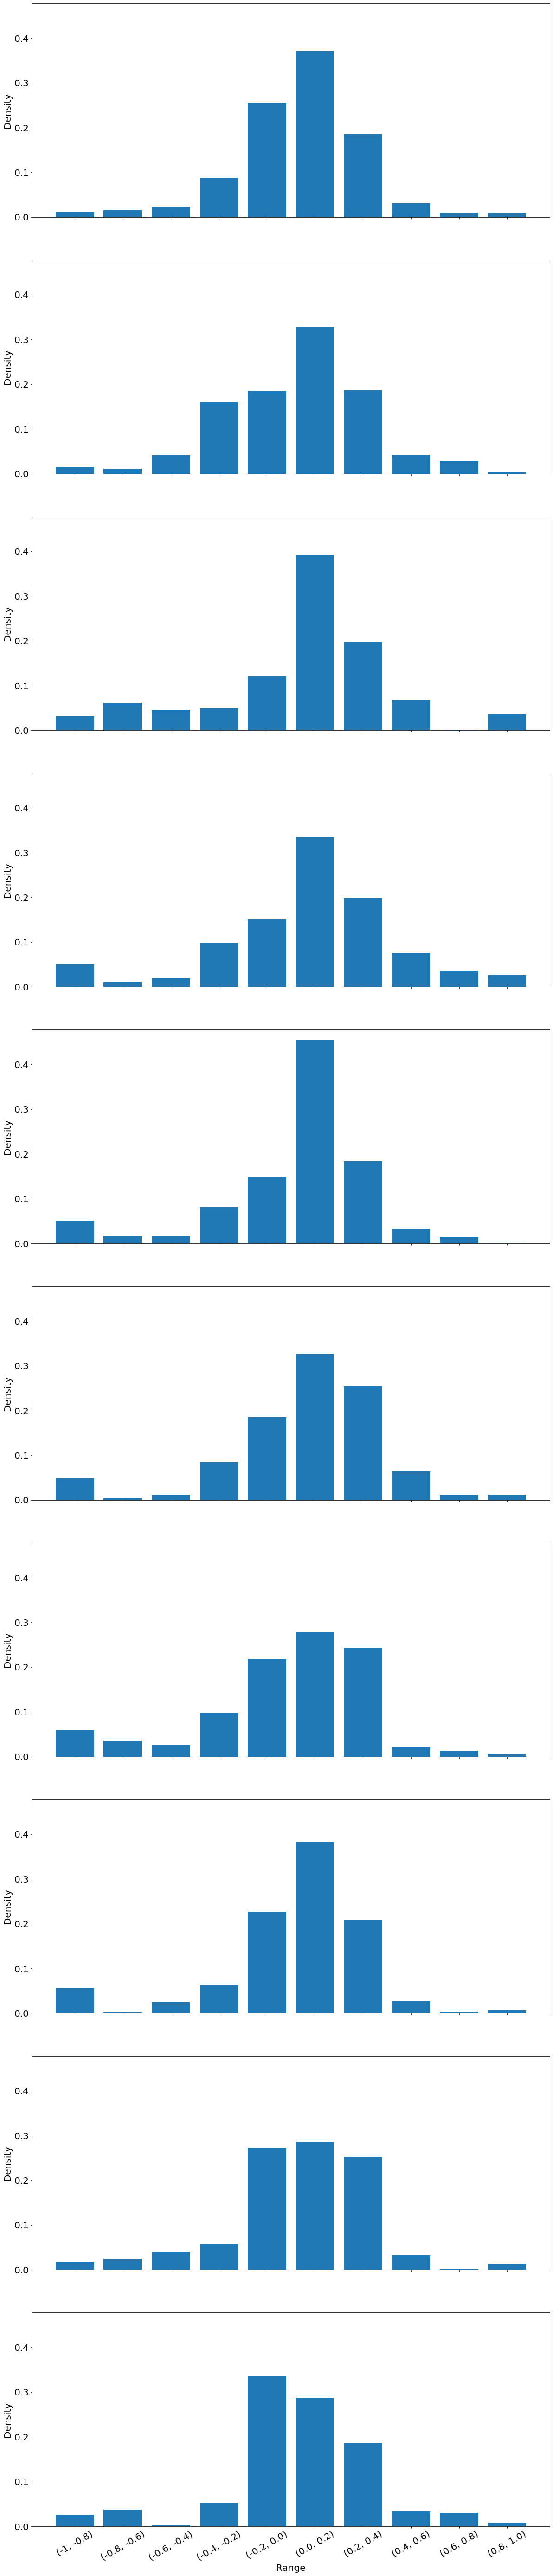

In [41]:
fig, axes = plt.subplots(len(sample_dists), sharex = True, sharey = True)
fig.set_figheight(10*len(sample_dists))
fig.set_figwidth(20)

i=0
for dist in sample_dists:
    index = np.arange(len(labels))                
    axes[i].bar(index, dist)
    #name = 'alpha = {}, beta = {}, sigma = {}, trunc_mean = {}'.format(alpha, beta, sigma, round(bins.mu, 3))
    #name = stock_names[ind][j]
    #            axes[i][j].set_title(name)
    axes[i].set_ylabel('Density')
    
    i += 1

plt.xticks(np.arange(len(labels)), labels, rotation=30)
plt.xlabel('Range')

plt.savefig('priorsamples.png', dpi = fig.dpi)